In [29]:
import kwant
from kwant.digest import uniform    # a (deterministic) pseudorandom number generator
import numpy as np
import math
from math import atan2, pi, sqrt, cos, sin
from cmath import exp
from types import SimpleNamespace
import matplotlib
from matplotlib import pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 5,5

In [30]:
h = 6.626069e-34    # Planck constant (Js)
e = 1.602e-19      # electron charge (C)
c = 299792458       # Light celerity (m/s)
kB = 1.3806503e-23  # Boltzmann constant (kg m2/Ks2)
m_e = 9.1e-31       # electron mass (kg)
h_bar = h/(2*math.pi)

In [31]:
def onsite(site):
    """
    potentiel de jonction pp
    """
    
    (x, y) = site.pos
    d = y * np.cos(60) + x * np.sin(60)
    if w == 0:
            return pot
    else:
        return pot * np.tanh(d / w)

In [5]:
def hopping(site_i, site_j):
    """
    Definition of the hopping parameter by including the magnetic field (parameter phi)
    
    """
    
    xi, yi = site_i.pos
    xj, yj = site_j.pos
    return -t * exp(-1j * np.pi * phi / (h/e) * (xi - xj) * (yi + yj)/alat**2)

In [6]:
def make_system(alat=1,W=1,L=1,t=1.0, h_l= 10, w_l=10,d_armEdge=10):
    graphene = kwant.lattice.honeycomb(alat,norbs=1)
    a, b = graphene.sublattices
    sys = kwant.Builder()
 
    def rectangular(pos):
        x, y = pos
        if (L-h_l)/2 < abs(y) < (L)/2:
            return abs(y) < (L)/2 and abs(x) < (W+w_l)/2
        return abs(x) < (W)/2 and abs(y) < (L+d_armEdge)/2 
    def lead_shape1(pos):
        x, y = pos
        return (L-h_l)/2 < abs(y) < L/2
  
    def lead_shape2(pos):
        x, y = pos
        return -W/2 < x < W/2
    
   
    
    sys[graphene.shape(rectangular, (0,0))] = onsite
    hoppings = (((0, 0), a, b), ((0, 1), a, b), ((-1, 1), a, b))
    sys[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = hopping

    sym0 = kwant.TranslationalSymmetry(graphene.vec((-1, 0)))
    lead0 = kwant.Builder(sym0)
    lead0[graphene.shape(lead_shape1, (0, L/2))] = -pot
    lead0[graphene.neighbors()]= hopping
    sys.attach_lead(lead0)
    sys.attach_lead(lead0.reversed())
   # sys.attach_lead(lead0.reversed())
    
    sym1 = kwant.TranslationalSymmetry(graphene.vec((-1, 0)))
    lead1 = kwant.Builder(sym1)
    lead1[graphene.shape(lead_shape1, (0, -L/2))] = pot
    lead1[graphene.neighbors()]= hopping
    sys.attach_lead(lead1)
    sys.attach_lead(lead1.reversed())
    
    return sys

0.027999999999999997
100


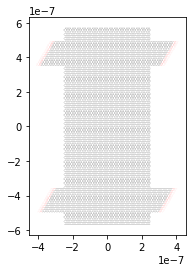

933422.9986688384


In [27]:
a0 = 0.142e-9  # réel
sf = 100 #scaling factor
alat = sf*a0 #scaled lattice factor
t0 = 2.8 ; #true hopping energy


t = t0/sf 
W = 5e-7; L = 10e-7 # width and length of the electronic system: ordre de dimension 10e-7

np = 0.5e16
Ef = (3/2) * t * (alat) * math.sqrt(math.pi*np) # Fermi energy computed from the electronic density
#Ef = 0.1
#Ef = 2*np.pi * t * (a * 1e-9)**2 * n2D # Fermi energy computed from the electronic density
h_l = 3e-7 ; w_l = 1e-7 ; d_armEdge =1.5e-7 
print(sf)
w = 0
junctionType = 'pp'
pot= 0 # Valeur du potentiel

sys = make_system(alat,W,L,t, h_l, w_l,d_armEdge)


sys = sys.finalized()
kwant.plot(sys, site_size=alat)
B_coef = 4*2*h_bar*math.sqrt(math.pi)/(e*L)*10e13
print(B_coef)
#ok

In [28]:
""" The wavelength must be (much more) larger than the lattice parameter """
lambda_F = 3 * pi * alat * t / Ef # computation of the wavelength in graphene
print('Fermi wavelength: ', lambda_F)
print('Scaled lattice parameter: ', alat)
if lambda_F/alat < 2:
    print('Warning : lambda_F must be larger than the lattice parameter alat')
    
""" We must be at low energy density at the level of the Dirac cone """
print('Fermi energy Ef: ', Ef)
print('Scaled hopping energy: ', t)
if Ef/t > (1/2):
    print('Warning : Ef must be smaller than (1/2)t')

Fermi wavelength:  5.013256549262001e-08
Scaled lattice parameter:  1.42e-08
Fermi energy Ef:  0.07474765514949643
Scaled hopping energy:  0.027999999999999997


In [7]:
### G3 = np.zeros(N)
p = 0.1
B_eff = B
amp = np.linspace(1e-3,6e-2,N)
G2 =  G3 =  M2 =M3 = np.zeros(N)
s = 0.2
p = 0.4
B=0
for i,po in enumerate(Field):
            B = p0
            params = SimpleNamespace(B_eff=B_eff)
            smatrix = kwant.smatrix(sys, energy = Ef) # transmission matrix (here this)
            T2 = smatrix.transmission(2,0)
            T3 = smatrix.transmission(3,0)# transmission value obtained from the left lead towards the right lead
            G2[i] = T2
            G3[i] = T3
plt.plot(Field,G2, label="Inf. gauche, Ef ="+str(Ef))
plt.plot(Field,G3, label="Inf. droit, Ef ="+str(Ef))

plt.xlabel('d')
plt.ylabel('Transmission')
plt.title("Transmission, jonction pn', s="+str(s))
plt.legend()
plt.show()

NameError: name 'B' is not defined

In [ ]:
vals=[onsite(sys.sites[n]) for n in range(sys.graph.num_nodes)]
kwant.plotter.map(sys, vals)

In [ ]:
def plot_transmission(sys, Ef):# params):
    # Compute conductance
    trans = []
    smatrix = kwant.smatrix(sys, Ef)
    trans.append(smatrix.transmission(3, 0))
    plt.plot(B, trans)
    #ok

In [ ]:
B = 0.0
phi = B * 3*np.sqrt(3)/(2) * alat**2
wfs = kwant.wave_function(sys, energy=Ef) # to obtain the wave functions of the system 
#de = kwant.operator.Density(sys)
J0 = kwant.operator.Current(sys)
wf_left = wfs(0)
current = sum(J0(p) for p in wf_left)
#density = sum(de(p) for p in wf_left)
#kwant.plotter.density(graph, density)
kwant.plotter.current(sys, current, cmap='viridis');

In [ ]:
B = 0.1
#phi = B * 3*np.sqrt(3)/(2)*alat**2
#kwant.plotter.bands(sys.leads[0]);

Field = np.linspace(0, B, 15)
trans = []
for A in Field:
    phi = A * 3*np.sqrt(3)/(2)*alat**2
    smatrix = kwant.smatrix(sys, Ef)
    trans.append(smatrix.transmission(1, 0))
    """ The scaling factor must be (much more) smaller than the magnetic length over the real lattice parameter """
    print('Scaling factor: ', sf)
    print('Magnetic length over the real lattice parameter: ', 180/np.sqrt(A))
    if sf > (1/4) * (180/np.sqrt(A)):
        print('Warning : sf must be larger than l_B/ao')
plt.plot(Field,trans)
plt.xlabel('Magnetic field (T)')
plt.ylabel('Transmission (2e²/h)')
plt.show()

In [ ]:
Field = np.linspace(0, B, 15)
for A in Field:
    B = A
    phi = A * 3*np.sqrt(3)/(2)*alat**2
    wfs = kwant.wave_function(sys, energy=Ef) # to obtain the wave functions of the system 
    de = kwant.operator.Density(sys)
    J0 = kwant.operator.Current(sys)
    wf_left = wfs(0)
    current = sum(J0(p) for p in wf_left)
    density = sum(de(p) for p in wf_left)
        #kwant.plotter.density(graph, density)
    print(B)
    kwant.plotter.current(sys, current, cmap='viridis');